In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Puzzle_state import puzzle_state
import matplotlib.colors as mcolors

In [2]:
def plot_puzzle(matrix):
    _, ax = plt.subplots()

    cmap_mascara = mcolors.ListedColormap(['white', 'red', 'orange', 'yellow', 'lime',
                                           'cyan', 'darkorchid', 'brown', 'gray'])

    ax.imshow(matrix, cmap=cmap_mascara)

    # Agregar números en cada casilla
    for i in range(3):
        for j in range(3):
            if matrix[i,j] != 0:
                ax.text(j, i, str(matrix[i, j]), ha='center', va='center', fontsize=25, color='black')

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [3]:
def a_star(start):
    closed_set = []
    open_set = [start]
    parent = {}
    goal = puzzle_state(np.array([[1, 2, 3],
                                [4, 5, 6],
                                [7, 8, 0]]), 0)
    print("Open set length:", len(open_set))
    while open_set:
        # Node in the open set having the lowest f value
        value = float('inf')
        #current = open_set[0]
        i = 0
        index_selected = 0
        while i < len(open_set):
            if open_set[i].f < value:
                value = open_set[i].f
                current = open_set[i]
                index_selected = i
            i += 1
        print("Current matrix", current.matrix)
        
        # Check for goal state
        if current == goal:
            return parent, current
        print("Before updating the sets")
        print("\tOpen set:", open_set)
        print("\tClosed set:", closed_set)
        # Remove current from open set and add to closed set
        closed_set += [open_set.pop(index_selected)]
        print("After updating the sets")
        print("\tOpen set:", open_set)
        print("\tClosed set:", closed_set)
        # Check neighbors
        for neighbor in current.neighbors():
            print("Neighbor", neighbor.matrix)
            # Check if neighbor is in closed set, then continue
            condition = False
            for node in closed_set:
                if neighbor == node:
                    condition = True
                    break
            if condition: continue
            print("Neighbor is not in closed set")
            tentative_g = current.g + 1
            
            # Check if neighbor is not in open set
            not_in_openset = True
            for node in open_set:
                if neighbor == node:
                    print("Neighbor is in open set")
                    not_in_openset = False
                    break
                                
            if not_in_openset or tentative_g < neighbor.g:
                print("Adding neighbor as parent")
                parent[neighbor] = current
                neighbor.g = tentative_g
                neighbor.f = neighbor.calculate_f(neighbor.g)
                if not_in_openset:
                    print("Adding neighbor to open set")
                    open_set += [neighbor]
    return None, None

In [4]:
start = puzzle_state(np.array([[1, 0, 3],
                               [4, 2, 5],
                               [7, 8, 6]]), 0)
parent, current = a_star(start)

Open set length: 1
Current matrix [[1 0 3]
 [4 2 5]
 [7 8 6]]
Before updating the sets
	Open set: [<Puzzle_state.puzzle_state object at 0x0000018D10E26FD0>]
	Closed set: []
After updating the sets
	Open set: []
	Closed set: [<Puzzle_state.puzzle_state object at 0x0000018D10E26FD0>]
Neighbor [[1 2 3]
 [4 0 5]
 [7 8 6]]
Neighbor is not in closed set
Adding neighbor as parent
Adding neighbor to open set
Neighbor [[1 3 0]
 [4 2 5]
 [7 8 6]]
Neighbor is not in closed set
Adding neighbor as parent
Adding neighbor to open set
Neighbor [[0 1 3]
 [4 2 5]
 [7 8 6]]
Neighbor is not in closed set
Adding neighbor as parent
Adding neighbor to open set
Current matrix [[1 2 3]
 [4 0 5]
 [7 8 6]]
Before updating the sets
	Open set: [<Puzzle_state.puzzle_state object at 0x0000018D10D3D450>, <Puzzle_state.puzzle_state object at 0x0000018D10DAEFD0>, <Puzzle_state.puzzle_state object at 0x0000018D10E274D0>]
	Closed set: [<Puzzle_state.puzzle_state object at 0x0000018D10E26FD0>]
After updating the sets
	Ope

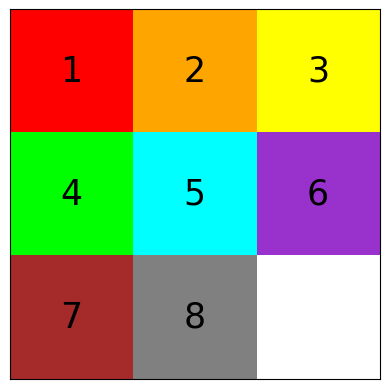

In [5]:
start = puzzle_state(np.array([[1, 2, 3],
                               [4, 5, 6],
                               [7, 8, 0]]), 0)
plot_puzzle(start.matrix)